Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\alberto\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rco

TypeError: get_tightbbox() missing 1 required positional argument: 'renderer'

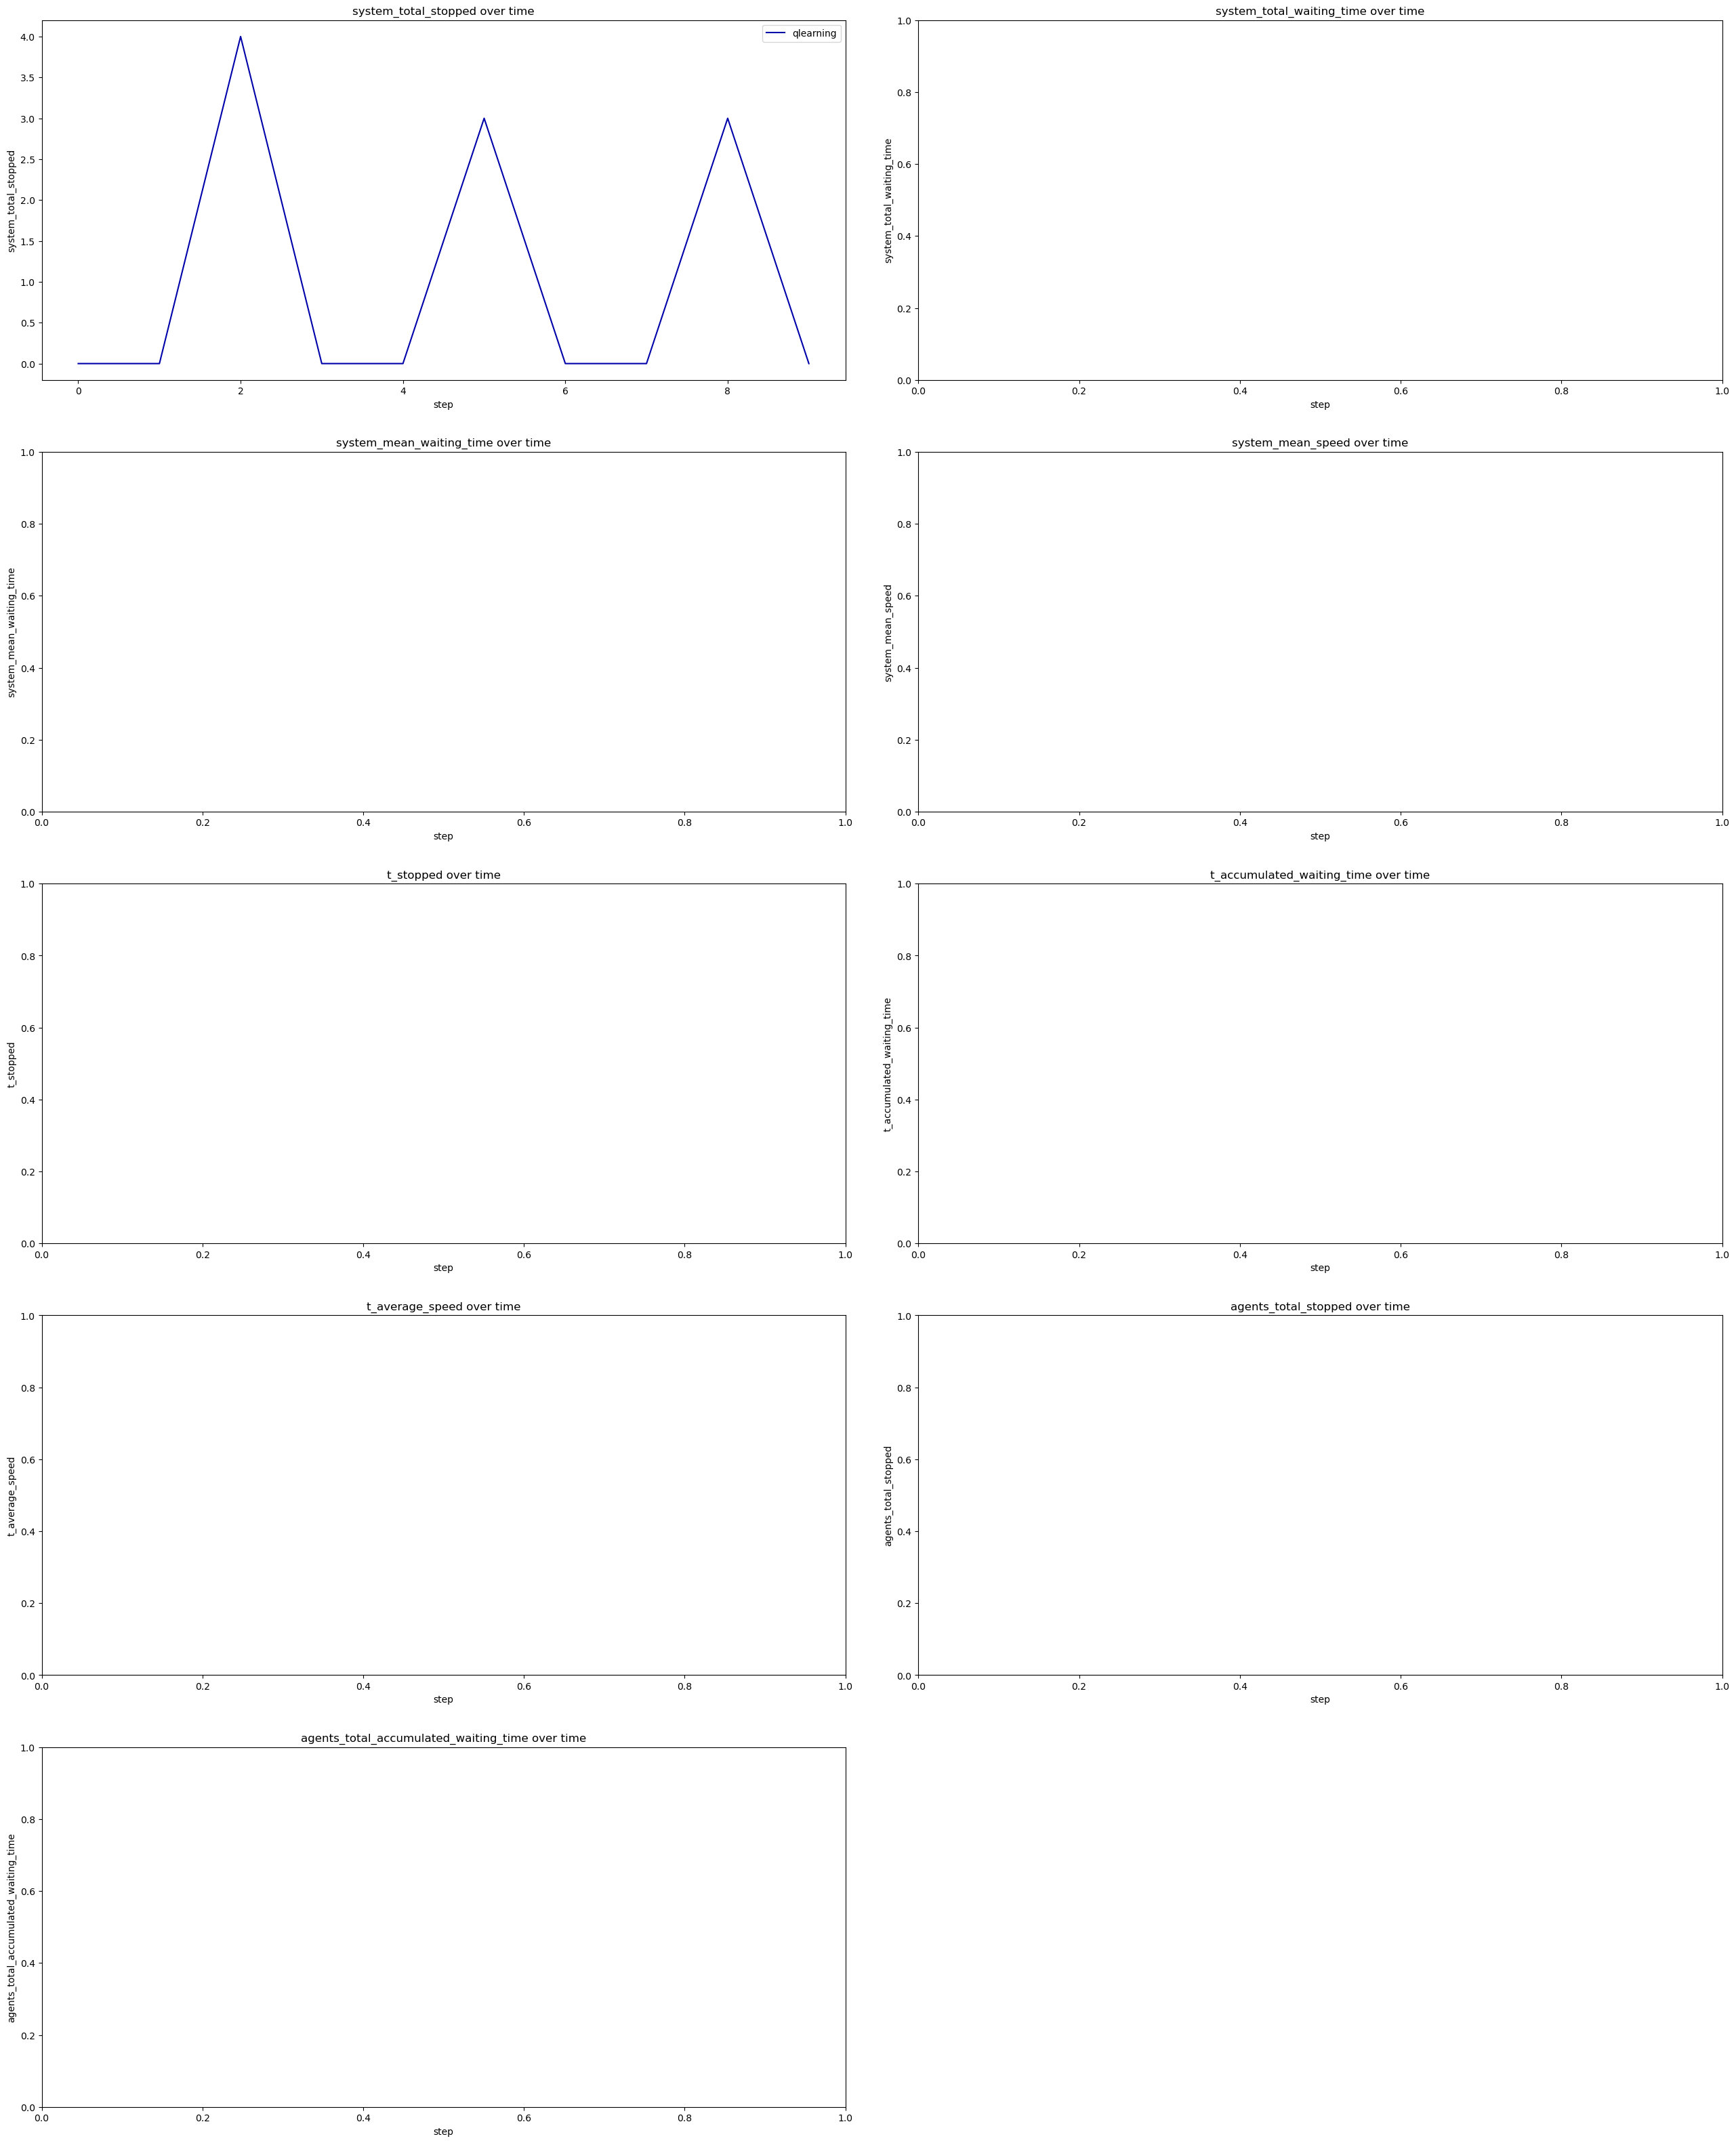

In [1]:
%matplotlib inline
from typing import Union
from test3 import execution
import pylab as pl
from IPython import display
from matplotlib.transforms import Bbox
from pathlib import Path

seconds = 10

agents: dict[str, dict[str, Union[str, bool, int]]] = {
  'qlearning': {
    'color': '#0000aa',
    'fixed': False
  # },
  # 'fixedcycle': {
  #   'color': '#aa0000',
  #   'fixed': True
  }
}
metrics: dict[str, dict[str, Union[list, pl.Axes]]] = {
  # 'step': {},
  'system_total_stopped': {},
  'system_total_waiting_time': {},
  'system_mean_waiting_time': {},
  'system_mean_speed': {},
  't_stopped': {},
  't_accumulated_waiting_time': {},
  't_average_speed': {},
  'agents_total_stopped': {},
  'agents_total_accumulated_waiting_time': {}
}
num_metrics = len(metrics)

plots_row_length = num_metrics // 2 + num_metrics % 2
plots_col_length = 2
dpi = 100

figure = pl.figure()
figure.set_dpi(dpi)
figure.set_figheight(plots_row_length * 8)
figure.set_figwidth(min(max(seconds / 10, 32), (2**16 - 1) / dpi))
gridspec = figure.add_gridspec(plots_row_length, plots_col_length * 2)

for metric in metrics:
  metrics[metric] = { agent: [] for agent in agents }
  index = list(metrics.keys()).index(metric)
  col_index = index % 2 * 2
  metrics[metric]['plot'] = figure.add_subplot(gridspec[index // 2, col_index:(col_index + 2)])
  metrics[metric]['plot'].set_title(f'{metric} over time')
  metrics[metric]['plot'].set_xlabel('step')
  metrics[metric]['plot'].set_ylabel(metric)

def updateMetrics(name: str, info: dict[str, Union[int, float]]):
  for metric in metrics:
    metrics[metric][name].append(info[metric])
    # metrics[metric]['plot'].plot(metrics[metric][name], color=color)
  # display.clear_output(wait=True)
  # display.display(pl.gcf())

for agent in agents:
  execution(updateMetrics, agent, seconds, agents[agent]['fixed'])

for metric in metrics:
  for agent in agents:
    metrics[metric]['plot'].plot(metrics[metric][agent], color=agents[agent]['color'])[0].set_label(agent)
    metrics[metric]['plot'].legend()
  bbox: Bbox = metrics[metric]['plot'].get_tightbbox(renderer=None)
  bbox = Bbox.from_extents(bbox.x0 / dpi, bbox.y0 / dpi, bbox.xmax / dpi, bbox.ymax / dpi)
  Path('outputs/single-intersection/plots/').mkdir(parents=True, exist_ok=True)
  pl.savefig(f'outputs/single-intersection/plots/{metric}_plot.png', bbox_inches=bbox.expanded(1.01, 1.01))

# pl.close(figure)